In [1]:
from sklearn.svm  import  SVC #分类
from sklearn.datasets import fetch_lfw_people#名人人脸数据
import numpy as  np
import  matplotlib.pyplot as plt
%matplotlib inline
from  sklearn.decomposition import  PCA #降低维度
from sklearn.model_selection  import GridSearchCV#调节参数
import logging
import pandas as  pd
from sklearn.model_selection  import  train_test_split
from  sklearn  import svm #svm算法
import  sklearn.datasets as datasets #数据集

In [2]:
data=datasets.load_digits() #载入数据集合，数字

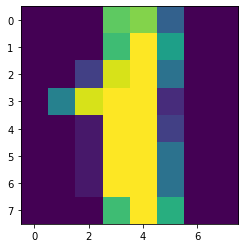

In [3]:
plt.imshow(data.images[1])

In [4]:
images=data.images #图片数据集合
targets=data.target #结果集合

In [5]:
targets

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
target_names=data.target_names #结果集合，不重复
target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
x_train,x_test,y_train,y_test=train_test_split(images,targets,train_size=0.85,random_state=10) #数据切割

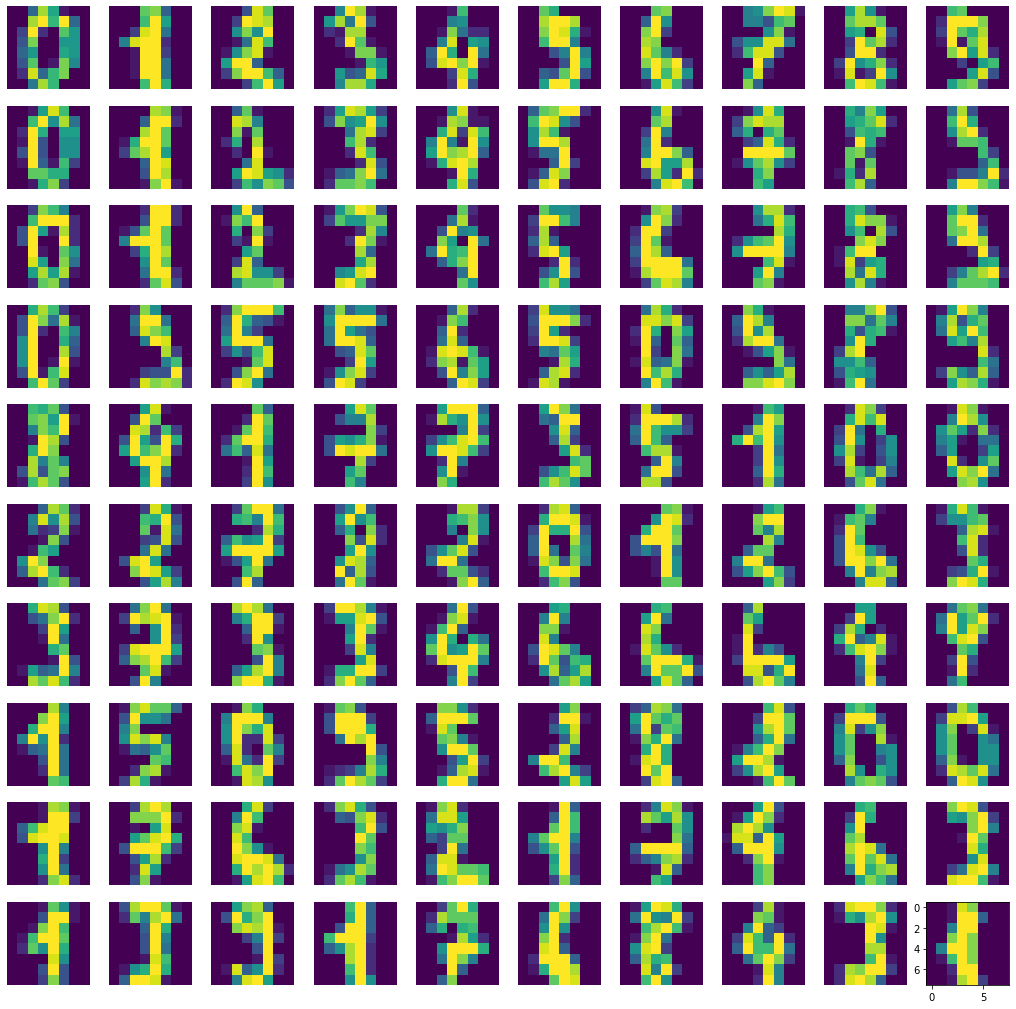

In [8]:
plt.figure(figsize=(18,18))#10*10
for  i  in range(100):
    plt.axis("off")
    plt.subplot(10,10,i+1)
    plt.imshow(images[i])
plt.show()


In [9]:
x_train.shape

(1527, 8, 8)

In [10]:
x_train=x_train.reshape((1527,64))

In [11]:
x_test.shape

(270, 8, 8)

In [12]:
x_test=x_test.reshape((270,64))

In [17]:

import sklearn
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import BernoulliRBM
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.externals import joblib



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [18]:
# 线性回归算法，最小二乘法，函数名，LinearRegression
def mx_line(train_x, train_y):
    mx = LinearRegression()
    mx.fit(train_x, train_y)
    # print('\nlinreg.intercept_')
    # print (mx.intercept_);print (mx.coef_)
    # linreg::model
    #
    return mx
mx= mx_line(x_train,y_train)
mx.score(x_test,y_test)

0.5791600970839539

In [19]:
# 逻辑回归算法，函数名，LogisticRegression
def mx_log(train_x, train_y):
    mx = LogisticRegression(penalty='l2')
    mx.fit(train_x, train_y)
    return mx
mx= mx_log(x_train,y_train)
mx.score(x_test,y_test)

0.9518518518518518

In [20]:
# 多项式朴素贝叶斯算法，Multinomial Naive Bayes，函数名，multinomialnb
def mx_bayes(train_x, train_y):
    mx = MultinomialNB(alpha=0.01)
    mx.fit(train_x, train_y)
    return mx
mx= mx_bayes(x_train,y_train)
mx.score(x_test,y_test)

0.8888888888888888

In [21]:
# KNN近邻算法，函数名，KNeighborsClassifier
def mx_knn(train_x, train_y):
    mx = KNeighborsClassifier()
    mx.fit(train_x, train_y)
    return mx
mx= mx_knn(x_train,y_train)
mx.score(x_test,y_test)

0.9814814814814815

In [22]:
# 随机森林算法， Random Forest Classifier, 函数名，RandomForestClassifier
def mx_forest(train_x, train_y):
    mx = RandomForestClassifier(n_estimators=8)
    mx.fit(train_x, train_y)
    return mx
mx= mx_forest(x_train,y_train)
mx.score(x_test,y_test)

0.9259259259259259

In [23]:
# 决策树算法，函数名，tree.DecisionTreeClassifier()
def mx_dtree(train_x, train_y):
    mx = tree.DecisionTreeClassifier()
    mx.fit(train_x, train_y)
    return mx
mx= mx_dtree(x_train,y_train)
mx.score(x_test,y_test)

0.8703703703703703

In [24]:
# GBDT迭代决策树算法，Gradient Boosting Decision Tree，
# 又叫 MART(Multiple Additive Regression Tree)，函数名，GradientBoostingClassifier
def mx_GBDT(train_x, train_y):
    mx = GradientBoostingClassifier(n_estimators=200)
    mx.fit(train_x, train_y)
    return mx
mx= mx_GBDT(x_train,y_train)
mx.score(x_test,y_test)

0.9592592592592593

In [25]:
# SVM向量机算法，函数名，SVC
def mx_svm(train_x, train_y):
    mx = SVC(kernel='rbf', probability=True)
    mx.fit(train_x, train_y)
    return mx
mx= mx_svm(x_train,y_train)
mx.score(x_test,y_test)    # haha .... 

0.4777777777777778

In [26]:
# SVM- cross向量机交叉算法，函数名，SVC .自动调优
def mx_svm_cross(train_x, train_y):
    mx = SVC(kernel='rbf', probability=True)
    param_grid = {'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}
    grid_search = GridSearchCV(mx, param_grid, n_jobs=1, verbose=1)
    grid_search.fit(train_x, train_y)
    best_parameters = grid_search.best_estimator_.get_params()
    # for para, val in best_parameters.items():
    #    print( para, val)
    mx = SVC(kernel='rbf', C=best_parameters['C'], gamma=best_parameters['gamma'], probability=True)
    mx.fit(train_x, train_y)
    return mx
mx= mx_svm_cross(x_train,y_train)
mx.score(x_test,y_test)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:   29.3s finished


0.9888888888888889

In [27]:
# MLP神经网络算法
def mx_MLP(train_x, train_y):
    # mx = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
    mx = MLPClassifier()
    mx.fit(train_x, train_y)
    return mx
mx= mx_MLP(x_train,y_train)
mx.score(x_test,y_test)

0.9666666666666667

In [28]:
# MLP神经网络回归算法
def mx_MLP_reg(train_x, train_y):
    # mx = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
    mx = MLPRegressor()
    mx.fit(train_x, train_y)
    return mx
mx= mx_MLP_reg(x_train,y_train)
mx.score(x_test,y_test)

0.8915901126490746

In [29]:
# SVM- cross向量机交叉算法，函数名，SVC .自动调优
def mx_svm_cross(train_x, train_y):
    mx = SVC(kernel='rbf', probability=True)
    param_grid = {'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}
    grid_search = GridSearchCV(mx, param_grid, n_jobs=1, verbose=1)
    grid_search.fit(train_x, train_y)
    best_parameters = grid_search.best_estimator_.get_params()
    # for para, val in best_parameters.items():
    #    print( para, val)
    mx = SVC(kernel='rbf', C=best_parameters['C'], gamma=best_parameters['gamma'], probability=True)
    mx.fit(train_x, train_y)
    return mx
mx= mx_svm_cross(x_train,y_train)
mx.score(x_test,y_test)
y_ = mx.predict(x_test) #预测结果

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:   40.8s finished


In [30]:
# 真实数据
plt.figure(figsize=(1.6 * 3, 1.2 * 4))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.axis('off')
    plt.imshow(x_test[i].reshape(8,8))
    plt.title("Training: %d" % target_names[y_test[i]])
plt.show()


In [ ]:
# 预测数据
plt.figure(figsize=(1.8 * 3, 1.2 * 4))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.axis('off')
    plt.imshow(x_test[i].reshape(8,8))
    plt.title("Pediction: %d" % target_names[y_[i]])
plt.show()